In [1]:
import pandas as pd
import numpy as np
import os
from pathlib import Path

# Define datasets and metrics
datasets = ['real1_Abalone', 'real2_WineQuality', 'real3_CalHousing', 
           'real4_Concrete', 'real5_BreastTumor', 'real6_echoMonths', 'real7_Satellite']
metrics = ['rhat', 'test_mse', 'pi_length', 'coverage', 'train_time']

# Results directory
results_dir = Path('results')

def load_and_summarize_metric(metric):
    """Load all dataset results for a specific metric and summarize"""
    summary_data = []
    
    for dataset in datasets:
        file_path = results_dir / f"{dataset}_{metric}.csv"
        
        if file_path.exists():
            try:
                # Read CSV file
                df = pd.read_csv(file_path)
                
                # Calculate mean and standard deviation for each column
                summary_row = {}
                summary_row['Dataset'] = dataset
                
                for column in df.columns:
                    mean_val = df[column].mean()
                    std_val = df[column].std()
                    # Format as mean(std) 
                    summary_row[column] = f"{mean_val:.4f}({std_val:.4f})"
                
                summary_data.append(summary_row)
                
            except Exception as e:
                print(f"Error processing {file_path}: {e}")
        else:
            print(f"File not found: {file_path}")
    
    return pd.DataFrame(summary_data)


Summary for RHAT
                  MultiBART_Rhat_Sigma2 DefaultBART_Rhat_Sigma2 MultiBART_Rhat_RMSE DefaultBART_Rhat_RMSE
Dataset                                                                                                  
real1_Abalone            1.0906(0.0473)          1.0966(0.0598)      1.1682(0.0777)        1.2902(0.1602)
real2_WineQuality        1.2488(0.1487)          1.1205(0.0452)      1.1762(0.1045)        1.2513(0.2098)
real3_CalHousing         1.6174(0.1807)          1.8268(0.1501)      1.4917(0.2218)        1.8286(0.2822)
real4_Concrete           1.1644(0.0828)          1.3333(0.1696)      1.3697(0.2163)        1.5070(0.3211)
real5_BreastTumor        1.0091(0.0044)          1.0318(0.0193)      1.4605(0.1960)        1.7778(0.2462)
real6_echoMonths         1.0369(0.0111)          1.0516(0.0285)      1.3104(0.2141)        1.3865(0.1566)
real7_Satellite          1.8306(0.1247)          1.7734(0.2425)      1.8989(0.3393)        1.5585(0.2944)


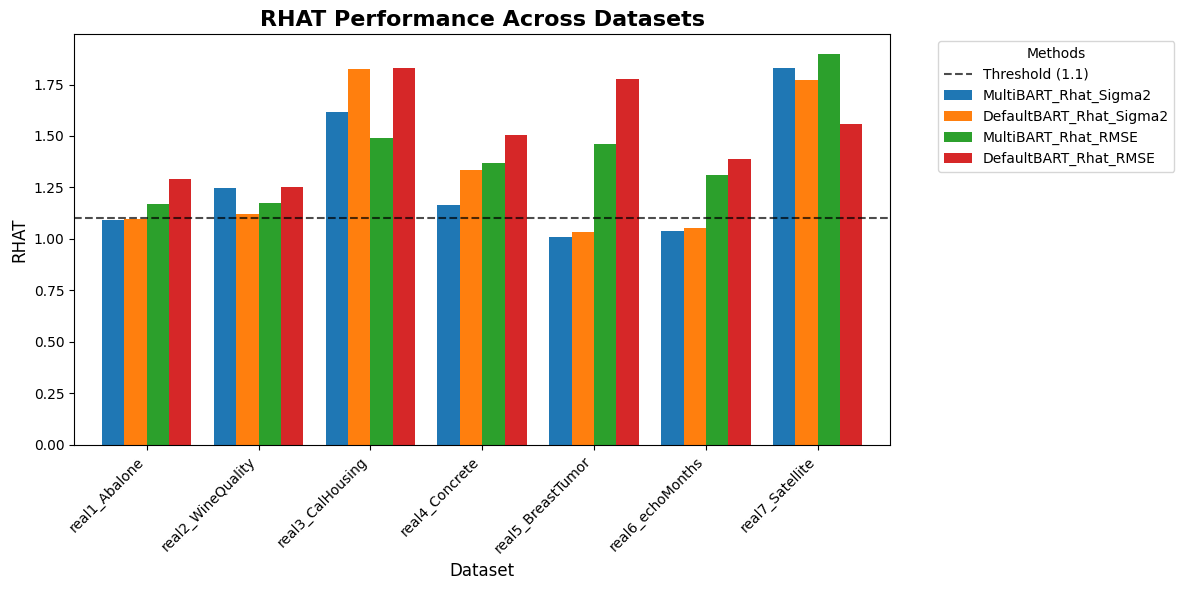


Summary for TEST_MSE
                          bart_mtmh              bart               btz                rf               xgb
Dataset                                                                                                    
real1_Abalone        4.9767(0.3500)    4.9523(0.3588)    4.9416(0.3074)    4.9276(0.2921)    5.5966(0.2619)
real2_WineQuality    0.4537(0.0225)    0.4672(0.0225)    0.4722(0.0169)    0.3730(0.0260)    0.4085(0.0229)
real3_CalHousing     0.2153(0.0056)    0.2238(0.0058)    0.2852(0.0060)    0.2610(0.0090)    0.2213(0.0054)
real4_Concrete      17.0602(2.1108)   20.2254(2.6599)   20.4191(3.0487)   25.4440(2.7678)   21.7897(4.6838)
real5_BreastTumor   87.8273(0.4475)   88.0506(0.4612)   87.8434(0.4569)  110.5386(0.6099)   89.2332(0.5569)
real6_echoMonths   129.6768(2.2783)  130.9395(2.2742)  131.1064(2.5459)  134.1892(2.7353)  142.4555(2.3940)
real7_Satellite      0.6203(0.0329)    0.6156(0.0372)    0.6214(0.0252)    0.5052(0.0262)    0.5390(0.0299)


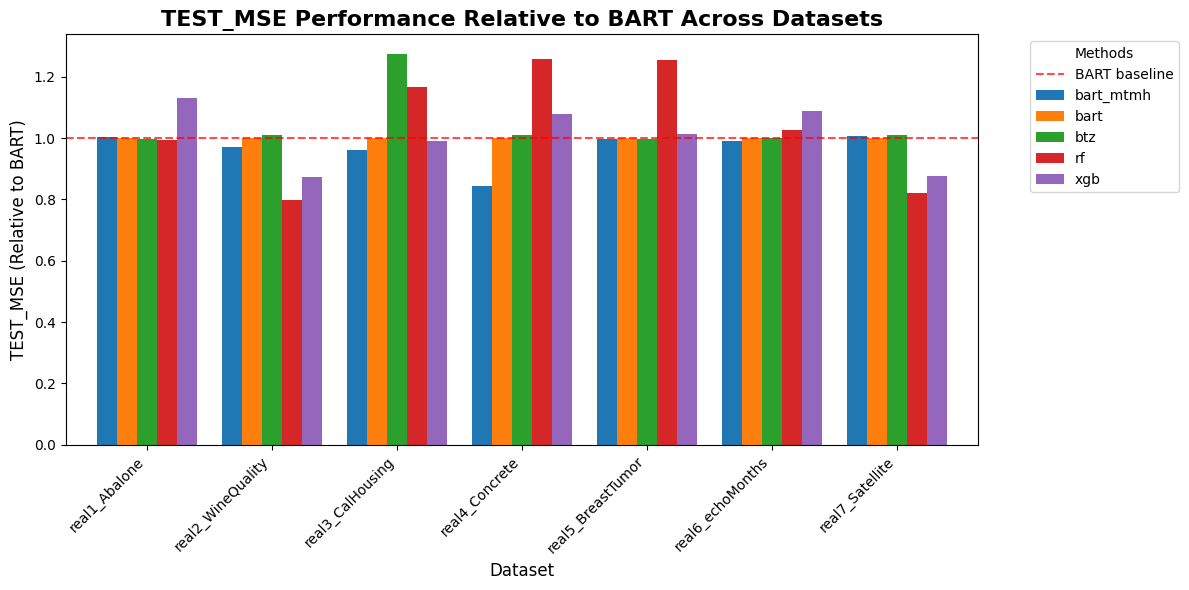


Summary for PI_LENGTH
                         bart_mtmh             bart              btz
Dataset                                                             
real1_Abalone       7.9643(0.1120)   8.0897(0.1003)   8.2757(0.0749)
real2_WineQuality   2.4829(0.0267)   2.5694(0.0292)   2.6627(0.0198)
real3_CalHousing    1.5765(0.0148)   1.7047(0.0129)   2.1609(0.0211)
real4_Concrete     13.5040(0.8445)  14.3043(0.7058)  16.5412(0.3465)
real5_BreastTumor  36.5659(0.0293)  36.6106(0.0361)  36.6829(0.0355)
real6_echoMonths   43.7997(0.1543)  44.2245(0.1490)  44.7826(0.1759)
real7_Satellite     1.8481(0.0461)   2.3146(0.0416)   2.8428(0.0531)


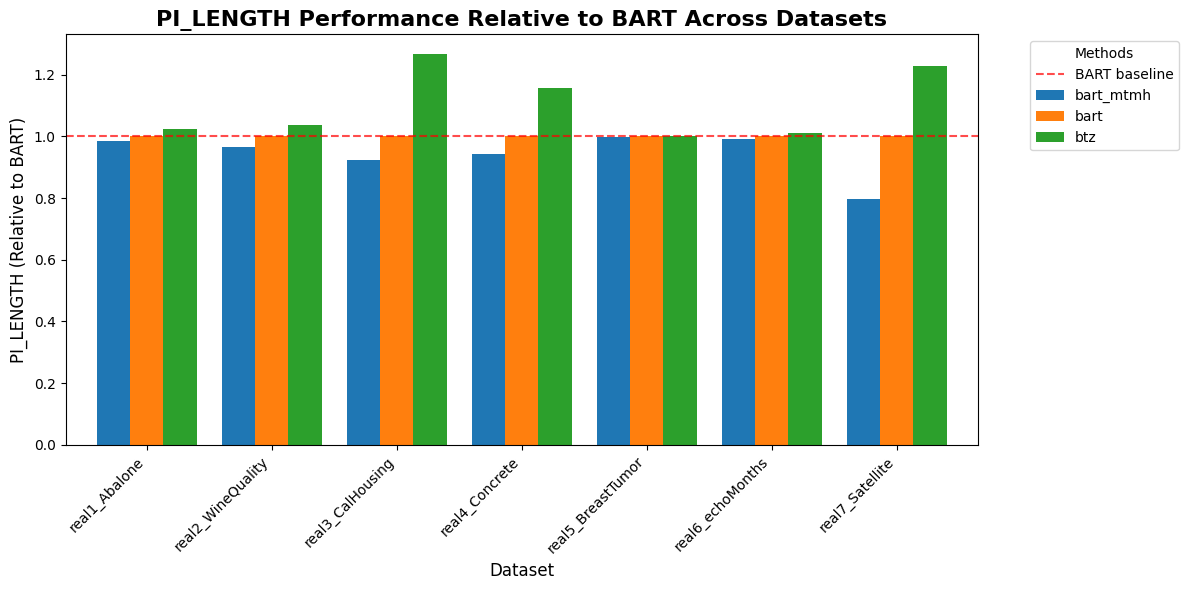


Summary for COVERAGE
                        bart_mtmh            bart             btz
Dataset                                                          
real1_Abalone      0.9280(0.0099)  0.9300(0.0092)  0.9338(0.0082)
real2_WineQuality  0.9342(0.0078)  0.9378(0.0080)  0.9429(0.0055)
real3_CalHousing   0.9265(0.0048)  0.9347(0.0034)  0.9477(0.0026)
real4_Concrete     0.9260(0.0205)  0.9140(0.0182)  0.9391(0.0169)
real5_BreastTumor  0.9365(0.0008)  0.9367(0.0008)  0.9376(0.0011)
real6_echoMonths   0.9372(0.0042)  0.9380(0.0036)  0.9424(0.0029)
real7_Satellite    0.8474(0.0140)  0.8891(0.0086)  0.9183(0.0066)


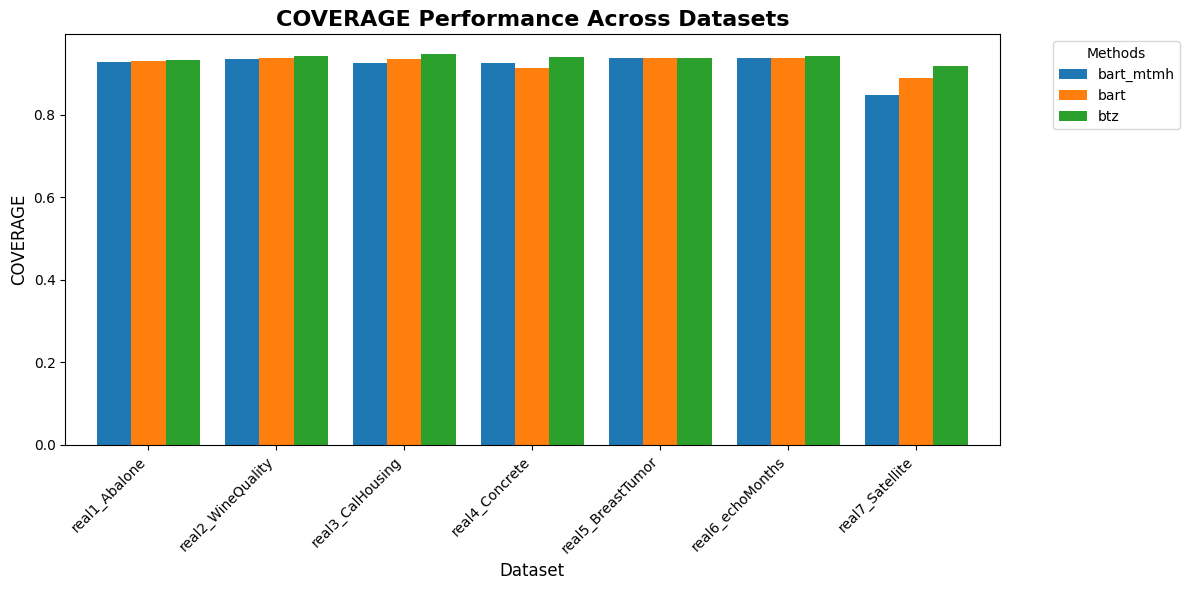


Summary for TRAIN_TIME
                            bart_mtmh               bart                btz                rf             xgb
Dataset                                                                                                      
real1_Abalone        214.0784(1.6332)   44.9795(19.7237)   56.1838(12.9454)    4.7847(2.6873)  0.5651(0.2828)
real2_WineQuality    310.0156(2.6164)   58.8791(13.4835)    59.8262(7.9849)    6.8317(2.9919)  0.5338(0.1700)
real3_CalHousing    696.8695(10.9188)   115.9546(2.9256)    74.5160(2.8704)   18.4252(1.5441)  0.4592(0.0748)
real4_Concrete       135.8537(0.6301)    24.4988(0.2343)    66.3649(8.4247)    3.0169(2.2323)  1.1190(0.8219)
real5_BreastTumor  4488.1058(35.0857)  967.3206(22.9571)  304.0082(11.6112)  71.9413(28.8793)  2.3429(0.9602)
real6_echoMonths     604.2227(8.2260)   103.4871(3.8169)    60.1746(1.5361)   13.2312(1.4546)  0.3460(0.0501)
real7_Satellite      300.4062(5.9691)    49.0738(1.6590)    36.1911(1.3973)    6.1325(0.4484)  0

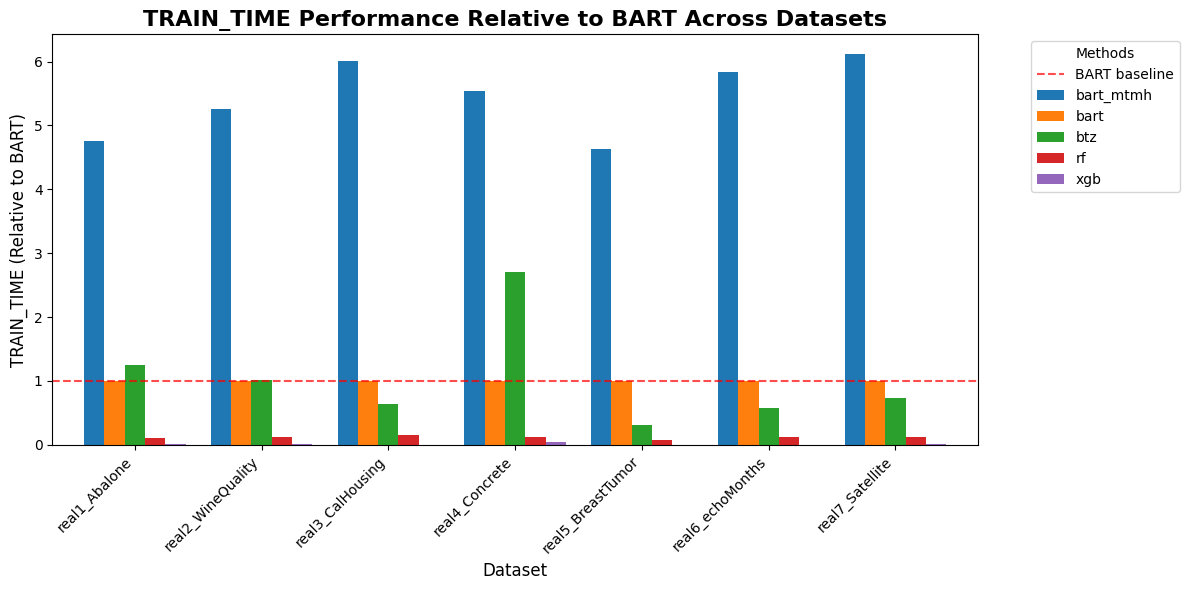

In [2]:
# Generate summary tables for each metric
import matplotlib.pyplot as plt
import seaborn as sns

for metric in metrics:
    print(f"\n{'='*50}")
    print(f"Summary for {metric.upper()}")
    print(f"{'='*50}")
    
    summary_df = load_and_summarize_metric(metric)
    
    if not summary_df.empty:
        # Set Dataset as index
        summary_df.set_index('Dataset', inplace=True)
        
        # Display table
        print(summary_df.to_string())
        
        # Create a numerical version for plotting
        plot_df = summary_df.copy()
        for col in plot_df.columns:
            # Extract mean values from "mean(std)" format
            plot_df[col] = plot_df[col].str.extract(r'(\d+\.?\d*)').astype(float)
        
        # Normalize data relative to BART performance (except for rhat and coverage)
        if metric not in ['rhat', 'coverage'] and 'bart' in plot_df.columns:
            for index in plot_df.index:
                bart_value = plot_df.loc[index, 'bart']
                if bart_value != 0:  # Avoid division by zero
                    plot_df.loc[index] = plot_df.loc[index] / bart_value
        
        # Create grouped bar chart
        fig, ax = plt.subplots(figsize=(12, 6))
        plot_df.plot(kind='bar', ax=ax, width=0.8)
        
        # Customize the plot
        if metric not in ['rhat', 'coverage']:
            ax.set_title(f'{metric.upper()} Performance Relative to BART Across Datasets', fontsize=16, fontweight='bold')
            ax.set_ylabel(f'{metric.upper()} (Relative to BART)', fontsize=12)
            # Add horizontal line at y=1 for reference
            ax.axhline(y=1, color='red', linestyle='--', alpha=0.7, label='BART baseline')
        else:
            ax.set_title(f'{metric.upper()} Performance Across Datasets', fontsize=16, fontweight='bold')
            ax.set_ylabel(f'{metric.upper()}', fontsize=12)
            if metric == 'rhat':
                # Add horizontal line at y=1.1 for rhat
                ax.axhline(y=1.1, color='black', linestyle='--', alpha=0.7, label='Threshold (1.1)')

        
        ax.set_xlabel('Dataset', fontsize=12)
        ax.legend(title='Methods', bbox_to_anchor=(1.05, 1), loc='upper left')
        
        # Rotate x-axis labels for better readability
        plt.xticks(rotation=45, ha='right')
        
        # Adjust layout to prevent clipping
        plt.tight_layout()
        plt.show()
        
    else:
        print(f"No data found for {metric}")

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

# Define datasets
datasets = ['real1_Abalone', 'real2_WineQuality', 'real3_CalHousing', 
           'real4_Concrete', 'real6_echoMonths', 'real7_Satellite']

# Results directory
results_dir = Path('results')

# Initialize a dictionary to store data for each metric
metric_data = {}

# Process each dataset's _tries.csv file
for dataset in datasets:
    file_path = results_dir / f"{dataset}_tries.csv"
    
    if file_path.exists():
        try:
            # Read the CSV file
            df = pd.read_csv(file_path)
            
            # Extract the column names (excluding the first column 'multi_tries')
            metrics = df.columns[1:]
            
            # Store the data for each metric
            for metric in metrics:
                if metric not in metric_data:
                    metric_data[metric] = []
                metric_data[metric].append((dataset, df['multi_tries'], df[metric]))
        
        except Exception as e:
            print(f"Error processing {file_path}: {e}")
    else:
        print(f"File not found: {file_path}")

# Plot each metric
for metric, data in metric_data.items():
    plt.figure(figsize=(10, 6))
    
    for dataset, multi_tries, values in data:
        # Normalize Test_MSE and Train_Time relative to their values at multi-tries=1
        if metric in ['Test_MSE', 'Train_Time']:
            values = values / values.iloc[0]
        
        plt.plot(multi_tries, values, marker='o', label=dataset)
    
    plt.xlabel('Multi-Tries', fontsize=12)
    if metric in ['Test_MSE', 'Train_Time']:
        plt.ylabel(f'{metric} (Relative to Multi-Tries=1)', fontsize=12)
        plt.title(f'{metric} vs Multi-Tries (Relative to Multi-Tries=1)', fontsize=16, fontweight='bold')
    else:
        plt.ylabel(metric, fontsize=12)
        plt.title(f'{metric} vs Multi-Tries', fontsize=16, fontweight='bold')
    plt.legend(title='Dataset', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(alpha=0.5)
    plt.tight_layout()
    plt.show()